In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import roc_auc_score

import random
random.seed(9001) 

In [ ]:
train = pd.read_csv('train.csv', parse_dates = ['Datetime'])
test = pd.read_csv('test.csv', parse_dates = ['Datetime'])
train = train.drop(columns=['ID'])
train['Datetime_day'] = train.Datetime.dt.day

# month
train['Datetime_month'] = train.Datetime.dt.month
 
# year
train['Datetime_year'] = train.Datetime.dt.year

# hour
train['Datetime_hour'] = train.Datetime.dt.hour
train = train.drop(columns=['Datetime'])
#train = train.dropna()
train = train.fillna(0)
X_train = train[["Sensor1_PM2.5","Sensor2_PM2.5","Temperature","Relative_Humidity","Datetime_day","Datetime_month","Datetime_year","Datetime_hour"]]
y_train = train["Offset_fault"]
"""from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)"""
train = pd.concat([X_train, y_train], axis=1, join='inner')
display(train)



,Sensor1_PM2.5,Sensor2_PM2.5,Temperature,Relative_Humidity,Datetime_day,Datetime_month,Datetime_year,Datetime_hour,Offset_fault
0,52.58,49.52,17.4,96.0,3,11,2021,4,0
1,35.25,33.40,25.0,75.0,8,11,2021,18,0
2,19.18,23.50,24.9,75.0,7,11,2021,9,0
3,19.40,15.48,24.9,70.0,1,1,2022,18,0
4,38.30,34.77,20.9,89.0,5,11,2021,22,0
...,...,...,...,...,...,...,...,...,...
297172,36.40,37.77,28.6,62.0,19,11,2021,12,0
297173,50.12,40.63,21.6,86.0,22,11,2021,1,1
297174,53.68,45.23,20.2,94.0,5,11,2021,1,1
297175,96.45,114.67,20.6,93.0,23,11,2021,22,0


In [ ]:
X = train.iloc[:, :-1].values    #   X -> Feature Variables
y = train.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print("Taille des predictor sur le train set : ", X_train.shape)
print("Taille de la target sur le train set : ", y_train.shape)
print("Taille des predictor sur le test set : ", X_test.shape)
print("Taille de la target sur le test set : ", y_test.shape)

Taille des predictor sur le train set :  (222882, 8)
Taille de la target sur le train set :  (222882,)
Taille des predictor sur le test set :  (74295, 8)
Taille de la target sur le test set :  (74295,)


In [ ]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score


dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0]
Test score:  0.6279830405814658


In [ ]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, lr_pred)

0.8942593714247258

In [ ]:
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    46144
1    28151
Name: 0, dtype: int64

In [ ]:
f1_score(y_test, lr_pred)

0.8591862340921312

In [ ]:
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,42472,4184
1,3672,23967


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.9654620095564977

In [ ]:
f1_score(y_test, rfc_pred)

0.9531563766475593

In [ ]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,45623,1033
1,1533,26106


In [ ]:
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [ ]:
test['Datetime_day'] = test.Datetime.dt.day
test['Datetime_month'] = test.Datetime.dt.month
test['Datetime_year'] = test.Datetime.dt.year
test['Datetime_hour'] = test.Datetime.dt.hour

test = test.fillna(0)



train_feats = ['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'Datetime_day','Datetime_month',	'Datetime_year', 'Datetime_hour']


test_df = test[['Sensor1_PM2.5',	'Sensor2_PM2.5',	'Temperature',	'Relative_Humidity',	'Datetime_day','Datetime_month',	'Datetime_year', 'Datetime_hour']]

#test_df = test_df.dropna()

"""test_df = test_df.apply(pd.to_numeric, errors='coerce')
# Take Mean
test_df  = test_df.fillna(test_df .mean())"""

test_df = test_df.fillna(0)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


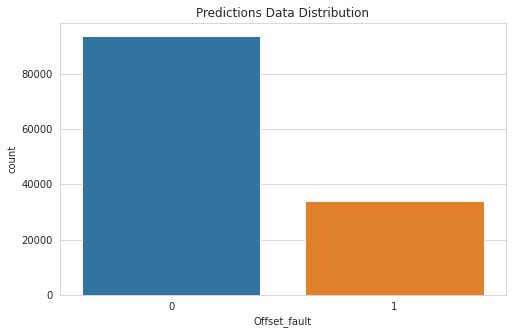

In [ ]:
predictions = rfc.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [ ]:
sub_file.to_csv('submit.csv', index = False)

In [ ]:
from sklearn.utils import resample

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.41%


Confusion matrix:
 [[44411  2440]
 [ 3197 24247]]


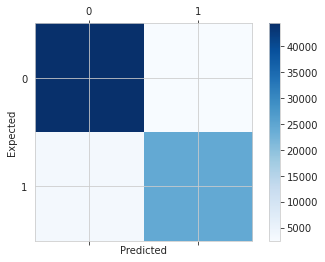

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['0', '1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
count_class_0, count_class_1 = train.Offset_fault.value_counts()

# Divide by class
df_class_0 = train[train['Offset_fault'] == 0]
df_class_1 = train[train['Offset_fault'] == 1]

Random under-sampling:
0    110274
1    110274
Name: Offset_fault, dtype: int64


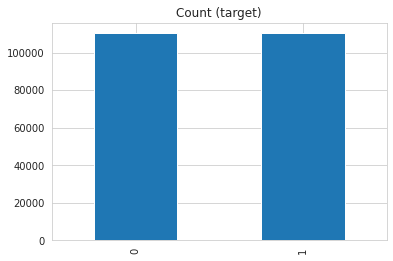

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Offset_fault.value_counts())

df_test_under.Offset_fault.value_counts().plot(kind='bar', title='Count (target)');

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.41%


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

KeyboardInterrupt: ignored

In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

KeyboardInterrupt: ignored

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
#evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

AdaBoostClassifier(n_estimators=30)

In [ ]:
Ttt = accuracy_score(y_train, ada_boost_clf.predict(X_train))
Tttt = accuracy_score(y_test, ada_boost_clf.predict(X_test))

In [ ]:
Tttt

0.8112389797429167

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
Ttt = accuracy_score(y_train, grad_boost_clf.predict(X_train))
Tttt = accuracy_score(y_test, grad_boost_clf.predict(X_test))

In [ ]:
Tttt

0.92287502523723

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


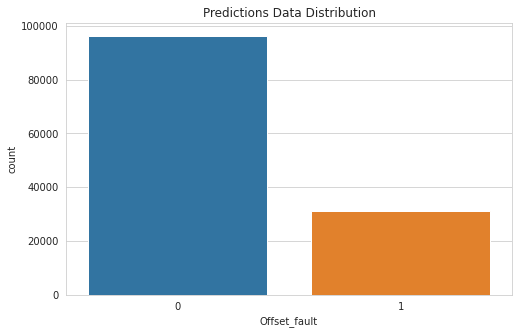

In [ ]:
predictions = grad_boost_clf.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [ ]:
sub_file.to_csv('submit.csv', index = False)

In [ ]:
import pandas  as pd
from   keras.models import Sequential
from   keras.layers import Dense

In [ ]:
n_neurons   = 50            # number of neurons in the first hidden layer
epochs      = 10 

In [ ]:
model = Sequential()         
model.add(Dense(n_neurons, input_dim=8, activation='relu'))
# output layer, with one neuron
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=epochs, verbose=0)

In [ ]:
predictions = model.predict(test_df)
# set a threshold of 50% for classification, i.e. >0.5 is True
# Note: the '*1' converts the Boolean array into an array containing 0 or 1
predictions = (predictions > 0.5)*1

In [ ]:
test_df.shape

(127361, 8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


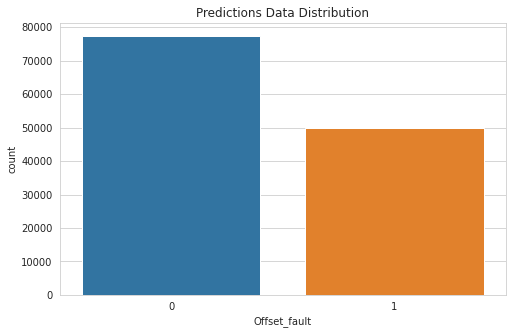

In [ ]:
ub_file = samplesubmission.copy()
sub_file.Offset_fault = predictions

# Check the distribution of your predictions
plt.figure(figsize=(8, 5))
sns.countplot(sub_file.Offset_fault)
plt.title('Predictions Data Distribution');

In [ ]:
sub_file.to_csv('submit.csv', index = False)